In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import io

In [20]:
def load_data(filename: str) -> pd.DataFrame:
    # tyto konstanty nemente, pomuzou vam pri nacitani
    headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
               "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27", "p28",
               "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
               "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t", "p5a"]

    # def get_dataframe(filename: str, verbose: bool = False) -> pd.DataFrame:
    regions = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }

    final_df = pd.DataFrame()

    with zipfile.ZipFile(filename, 'r') as data:
        for zipfiles in data.namelist():
            with data.open(zipfiles, 'r') as year:
                with zipfile.ZipFile(io.BytesIO(year.read())) as zip:
                    for region_name, region_code in regions.items():
                        with zip.open(f"{region_code}.csv", 'r') as csv_file:
                            df = pd.read_csv(csv_file,sep=';', names=headers, encoding='cp1250', low_memory=False)
                            df["region"] = region_name
                            final_df = pd.concat([final_df, df], ignore_index=True)
    
    return final_df

In [124]:
df = load_data("data.zip")

In [167]:
def parse_data(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    new_df = df.copy()
    new_df.drop_duplicates(subset='p1', inplace=True)
    new_df["date"] = pd.to_datetime(new_df["p2a"], format="%Y-%m-%d")
    new_df.drop(columns=["p2a"], inplace=True)
    cols_to_skip = ["date", "region"]
    category_cols = ["p47", "h", "i", "k", "l", "p", "q", "t"]
    float_cols = ["a", "b", "d", "e", "f", "g", "n", "o"]

    for col in category_cols:
        new_df[col] = new_df[col].astype("category")

    for col in float_cols:
        new_df[col] = new_df[col].str.replace(",", ".")

    for col in new_df.columns:
        if col not in cols_to_skip and col not in category_cols:
                new_df[col] = pd.to_numeric(new_df[col], errors="coerce")


    if verbose:
        orig_memory_usage = df.memory_usage(deep=True).sum()
        new_memory_usage = new_df.memory_usage(deep=True).sum()

        orig_memory_usage_mb = orig_memory_usage / 1e6
        new_memory_usage_mb = new_memory_usage / 1e6

        print(f"Original size: {orig_memory_usage_mb:.2f} MB")
        print(f"New size: {new_memory_usage_mb:.2f} MB")

    
    return new_df
    

In [33]:
df

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,2100160001,4,NaN,2016-01-01,5,55,1,1,0,2,...,NaN,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA
1,2100160002,4,NaN,2016-01-01,5,130,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
2,2100160003,5,NaN,2016-01-01,5,100,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
3,2100160004,6,NaN,2016-01-01,5,120,9,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
4,2100160005,6,NaN,2016-01-01,5,2560,2,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707022,190910224060,3,21030.0,2022-12-28,3,835,5,0,0,2,...,21030,NaN,NaN,NaN,NaN,511587.0,NaN,NaN,2,KVK
707023,190910224148,8,NaN,2022-12-27,2,1900,3,0,6,2,...,NaN,NaN,NaN,NaN,NaN,538434.0,554553.0,NaN,1,KVK
707024,190910224288,6,NaN,2022-12-30,5,1000,3,0,3,2,...,NaN,NaN,NaN,NaN,NaN,560464.0,550817.0,NaN,1,KVK
707025,190910224334,2,210.0,2022-12-30,5,1525,3,0,2,2,...,210,NaN,NaN,NaN,NaN,560286.0,NaN,NaN,1,KVK


In [71]:
df.memory_usage(deep=True).sum()

1088288105

In [166]:
object_columns = df.select_dtypes(include=['float']).columns
object_columns

Index(['p37', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p39', 'p45a', 'p48a',
       'p49', 'p50a', 'p50b', 'p51', 'p52', 'p55a', 'p57', 'p58', 'j', 'r',
       's'],
      dtype='object')

In [136]:
df["o"].unique()

array([nan, '0,009064', '0,066453', ..., '0,949151', '3,396823',
       '2,290515'], dtype=object)

In [126]:
df["o"].unique()

array([nan, '0,009064', '0,066453', ..., '0,949151', '3,396823',
       '2,290515'], dtype=object)

In [168]:
modified_df = parse_data(df, True)

Original size: 1088.29 MB
New size: 380.92 MB


In [169]:
modified_df["p57"]

0         1.0
1         1.0
2         1.0
3         5.0
4         NaN
         ... 
707022    1.0
707023    NaN
707024    1.0
707025    1.0
707026    1.0
Name: p57, Length: 707023, dtype: float64

In [217]:
def plot_state(df: pd.DataFrame, fig_location: str = None,
               show_figure: bool = False):
    
    state_map = {
        7: 'invalida',
        6: 'nemoc, úraz apod.',
        5: 'pod vlivem alkoholu 1‰ a více',
        4: 'alkoholu, obsah alkoholu v krvi do 0,99 ‰',
        9: 'sebevražda',
        8: 'řidič při jízdě zemřel (infarkt apod.)'
    }

    df['state'] = df['p57'].map(state_map)

    # Group by region and state and count occurrences
    grouped_data = df.groupby(['region', 'state']).size().reset_index(name='count')

    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Create a figure with 6 subplots (2 rows and 3 columns)
    fig, axes = plt.subplots(3, 2, figsize=(10, 15), constrained_layout=True)
    fig.suptitle('Number of Accidents by State and Region')

    axes_flat = axes.flatten()

    # Iterate over the states and create a bar plot for each
    for idx, (state, description) in enumerate(state_map.items()):
        ax = axes_flat[idx]
        sns.barplot(x='region', y='count', 
                    data=grouped_data[grouped_data['state'] == description], 
                    ax=ax, palette='ch:start=.2,rot=-.3', hue='count', dodge=False)
        ax.set_title(f"Stav řidiče: {description}")

        ax.set_xlabel('')
        ax.set_ylabel('')

        ax.get_legend().remove()

        if idx < 4:
            ax.set_xticklabels([])

        if idx > 3:
            ax.set_xlabel('Kraj')

        if idx % 2 == 0:
            ax.set_ylabel('Počet nehod')
        

    if fig_location:
        fig.savefig(fig_location)

    if show_figure:
        plt.show()


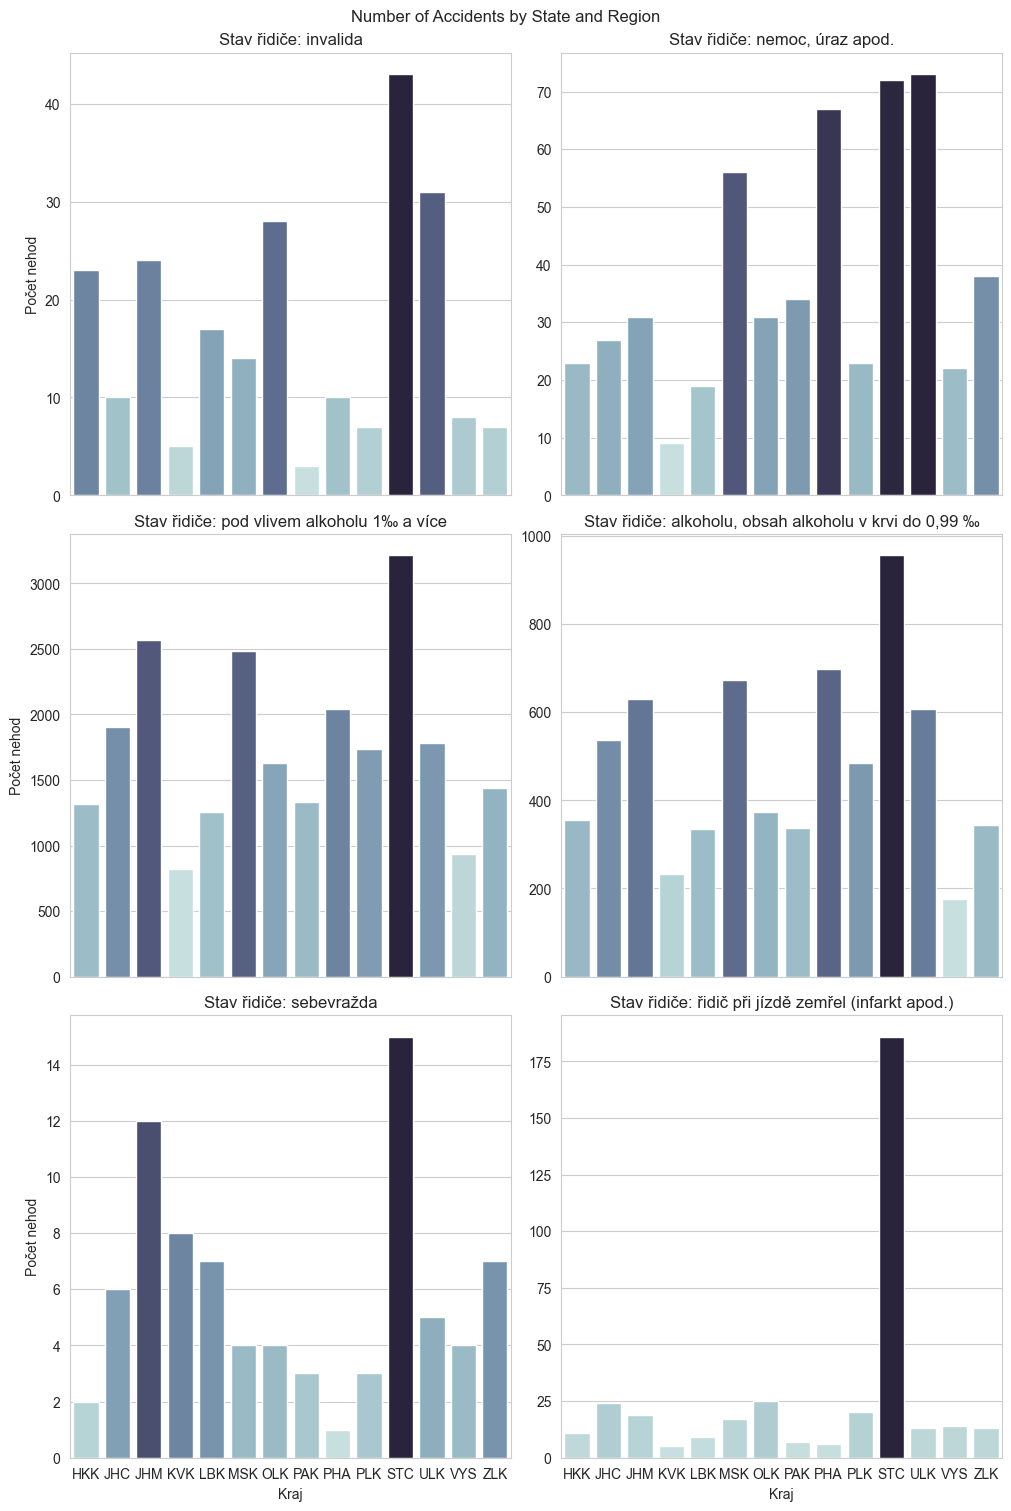

In [218]:
plot_state(modified_df, "01_state.png")